# Modelo probabilista para SARS-CoV-2 considerando grupos por edades.
### Carlos Ignacio Herrera-Nolasco$^{1,2}$ , Marco Arieli Herrera-Valdez$^{1,2}$ & Sergio Iván Lopez Ortega$^{2}$
#### $^{1}$ Laboratorio de Fisiología de Sistemas, Facultad de Ciencias, UNAM
#### $^{2}$  Departamento de Matemáticas, Facultad de Ciencias, UNAM


El SARS-CoV-2 afecta de diferentes maneras a los individuos dependiendo de la edad en la que estos se encuentren. En particular, individuos de edades avanzadas son más propensos a tener padecimientos agudos generados por Covid-19 generando grupos de riesgo, lo que recae en probabilidades de fallecimiento, recuperación e infección diferentes para cada grupo de edad.

Mediante la utilización del PSIR Metapoblacional se puede plantear entonces la dinámica de transmisión en términos de rangos de edad en la población.



Se consideran intervalos de edades de 10 años comenzando en $[0,10]$ y terminando en $(80,90]$, en el que cada grupo por edad se clasifica de acuerdo a los intervalos.

El modelo estocástico para la propagación de la enfermedad en términos de los grupos por edad se puede escribir de la forma 
\begin{eqnarray*}
S_{1}(t+ h) &=& S_{1}(t) - \sum_{i=1}^{9} X_{1,i}(t)\\ 
S_{2}(t+ h) &=& S_{2}(t) - \sum_{i=1}^{9} X_{2,i}(t)\\
\vdots\\
S_{9}(t+ h) &=& S_{9}(t) - \sum_{i=1}^{9} X_{9,i}(t),\\
\end{eqnarray*}
\begin{eqnarray*}
I_{1}(t+ h) &=& I_{1}(t) + \sum_{i=1}^{9} X_{1,i}(t) - C_{1}(t) - D_{1}(t)\\ 
I_{2}(t+ h) &=& I_{2}(t) + \sum_{i=1}^{9} X_{2,i}(t) - C_{2}(t) - D_{2}(t)\\
\vdots\\
I_{9}(t+ h) &=& I_{9}(t) + \sum_{i=1}^{9} X_{9,i}(t) - C_{9}(t) - D_{9}(t),\\
\end{eqnarray*}
\begin{eqnarray*}
R_{1}(t+ h) &=& R_{1}(t) +  C_{1}(t) - D_{1}(t)\\ 
R_{2}(t+ h) &=& R_{2}(t) +  C_{2}(t) - D_{2}(t)\\
\vdots\\
R_{9}(t+ h) &=& R_{9}(t) +  C_{9}(t) - D_{9}(t).\\
\end{eqnarray*}

Donde $S_{i}(t)$, $I_{i}(t)$, $R_{i}(t)$ son las cantidades de susceptibles, infectados y removidos al tiempo $t$, $X_{i,j}(t) \sim Bin(\lfloor \epsilon_{i} S_{i}(t) \rfloor, \beta \frac{I_{j}(t)}{N} \delta)$, es la cantidad de nuevos infectados generados por el contacto entre el grupo $i$ y $j$, $C_{i}(t) \sim Bin(I_{i}(t), e^{- \lambda h}\frac{C_{i}(t-1)}{I_{i}(t-1)})$ es la cantidad de nuevos recuperados para el grupo $i$ y $C_{i}(t) \sim Bin(I_{i}(t) - C_{i}(t) , (1-e^{- \lambda h})\frac{D_{i}(t-1)}{I_{i}(t-1)})$ es el muestreo de nuevos muertos una vez muestreados los recuperados. 

In [29]:
import scipy as sc
from scipy.stats import binom
from scipy import stats as st
from math import floor
import matplotlib.pylab as gr
import math
import numpy as np


### Estimación de probabilidades###

Los parámetros para los muestreos pueden obtenerse mediante la ley total de probabilidad al condicionar sobre los grupos de edad (GE), para $\beta$, se tiene
\begin{eqnarray}
\beta &=& P(\textrm{Infección} | \textrm{Contacto}) = \sum_{\textrm{GE}} P(\textrm{Infección} | \textrm{Contacto} | \textrm{Pertenecer al GE}) P(\textrm{Pertenecer al GE})\\
&=& \sum_{\textrm{GE}} \frac{\textrm{# infectados pertenecientes a cada GE}}{\textrm{# infectados totales}} \frac{\textrm{# individuos en cada GE}}{\textrm{# total de individuos en la población}}
\end{eqnarray}
El término $1- e^{- \lambda h}$ en la probabilidad de muerte hace referencia a la probabilidad de remoción dado el fallecimiento en la población, y busca describir como a mayor edad mayor es la probabilidad mencionada, las unidades de $h$ están en años.

Ejemplo

En Korea se ha registrado un porcentaje de mortalidad en individuos de 80 años del 11.6% de los casos confirmados. Despejando $\lambda$ se obtiene
\begin{eqnarray}
1-e^{-\lambda (80)} &=& \frac{116}{1000}\\
e^{-\lambda (80)} &=& 1 - \frac{116}{1000}\\
e^{-\lambda (80)} &=& 0.884\\
-\lambda (80) &=& - 0.12329\\
\lambda &=& \frac{- 0.12329}{- 80}\\
\lambda &=& 0.00154
\end{eqnarray}

In [32]:
a = 1- (116/1000)
b = math.log(a)
c = b/(-80)
print('a=',a,'log(a)=',b,'lambda =',c )

a= 0.884 log(a)= -0.1232982163444936 lambda = 0.00154122770430617


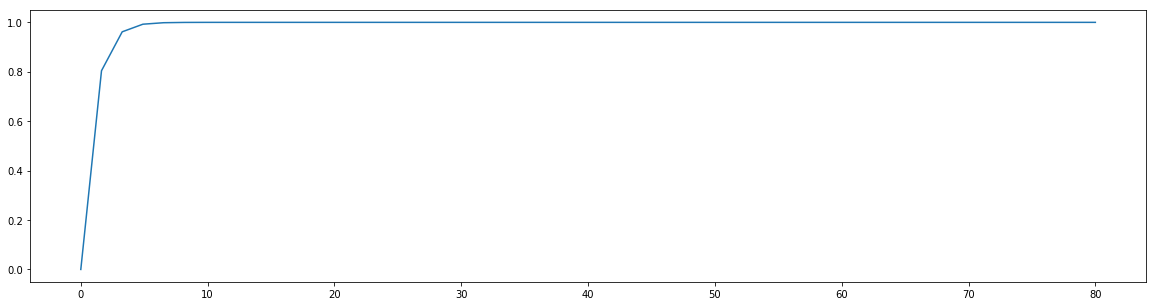

In [41]:
Lambda = 0.00154
exp = st.expon(Lambda)
x = np.linspace(0, 80)

F = exp.cdf(x)
fig = gr.figure(figsize = (20,5))
gr.plot(x,F)
gr.show()

In [1]:
# Probabilistic SIR with simple binomial dynamics for the newly infected and the newly removed from the chain of infection
def pSIR(p):
    S1=sc.zeros(p['nSteps'],'int32')
    S2=sc.zeros(p['nSteps'],'int32')
    S3=sc.zeros(p['nSteps'],'int32')
    S4=sc.zeros(p['nSteps'],'int32')
    S5=sc.zeros(p['nSteps'],'int32')
    S6=sc.zeros(p['nSteps'],'int32')
    S7=sc.zeros(p['nSteps'],'int32')
    S8=sc.zeros(p['nSteps'],'int32')
    S9=sc.zeros(p['nSteps'],'int32')
    I1=sc.zeros(p['nSteps'],'int32')
    I2=sc.zeros(p['nSteps'],'int32')
    I3=sc.zeros(p['nSteps'],'int32')
    I4=sc.zeros(p['nSteps'],'int32')
    I5=sc.zeros(p['nSteps'],'int32')
    I6=sc.zeros(p['nSteps'],'int32')
    I7=sc.zeros(p['nSteps'],'int32')
    I8=sc.zeros(p['nSteps'],'int32')
    I9=sc.zeros(p['nSteps'],'int32')
    R1=sc.zeros(p['nSteps'],'int32')
    R2=sc.zeros(p['nSteps'],'int32')
    R3=sc.zeros(p['nSteps'],'int32')
    R4=sc.zeros(p['nSteps'],'int32')
    R5=sc.zeros(p['nSteps'],'int32')
    R6=sc.zeros(p['nSteps'],'int32')
    R7=sc.zeros(p['nSteps'],'int32')
    R8=sc.zeros(p['nSteps'],'int32')
    R9=sc.zeros(p['nSteps'],'int32')
    S1[0]=p['s10']; I1[0]=p['i10']; R1[0]=p['r10']
    S2[0]=p['s20']; I2[0]=p['i20']; R2[0]=p['r20']
    S3[0]=p['s30']; I3[0]=p['i30']; R3[0]=p['r30']
    S4[0]=p['s40']; I4[0]=p['i40']; R4[0]=p['r40']
    S5[0]=p['s50']; I5[0]=p['i50']; R5[0]=p['r50']
    S6[0]=p['s60']; I6[0]=p['i60']; R6[0]=p['r60']
    S7[0]=p['s70']; I7[0]=p['i70']; R7[0]=p['720']
    S8[0]=p['s80']; I8[0]=p['i80']; R8[0]=p['r80']
    S9[0]=p['s90']; I9[0]=p['i90']; R9[0]=p['r90']
    N0=p['s10']+p['s20']+p['s30']+p['s40']+p['s50']+p['s60']+p['s70']+p['s80']+p['s90']+p['i10']+p['i20']+p['i30']+p['i40']+p['i50']+p['i60']+p['i70']+p['i80']+p['i90']+p['r10']+p['r20']+p['r30']+p['r40']+p['r50']+p['r60']+p['r70']+p['r80']+p['r90'] 
  
    for n in range(p['nSteps']-1):
        pContact1 = p['stepSize']*p['exposure']*I1[n]/sc.float32(N0)
        pInfec1 = p['stepSize']*p['pSuccTrans']*pContact1
        pContact2 = p['stepSize']*p['exposure']*I2[n]/sc.float32(N0)
        pInfec2 = p['stepSize']*p['pSuccTrans']*pContact1
        pContact3 = p['stepSize']*p['exposure']*I3[n]/sc.float32(N0)
        pInfec3 = p['stepSize']*p['pSuccTrans']*pContact1
        pContact4 = p['stepSize']*p['exposure']*I4[n]/sc.float32(N0)
        pInfec4 = p['stepSize']*p['pSuccTrans']*pContact1
        pContact5 = p['stepSize']*p['exposure']*I5[n]/sc.float32(N0)
        pInfec5 = p['stepSize']*p['pSuccTrans']*pContact1
        pContact6 = p['stepSize']*p['exposure']*I6[n]/sc.float32(N0)
        pInfec6 = p['stepSize']*p['pSuccTrans']*pContact1
        pContact7 = p['stepSize']*p['exposure']*I7[n]/sc.float32(N0)
        pInfec7 = p['stepSize']*p['pSuccTrans']*pContact1
        pContact8 = p['stepSize']*p['exposure']*I8[n]/sc.float32(N0)
        pInfec8 = p['stepSize']*p['pSuccTrans']*pContact1
        pContact9 = p['stepSize']*p['exposure']*I9[n]/sc.float32(N0)
        pInfec9 = p['stepSize']*p['pSuccTrans']*pContact1
        #variables para las infecciones provocadas por todos los grupos hacia el grupo1
        newI1 = binom.rvs(floor((1/9)*S1[n]),pInfec1,size=1)
        newI2 = binom.rvs(floor((1/9)*S1[n]),pInfec2,size=1)
        newI3 = binom.rvs(floor((1/9)*S1[n]),pInfec3,size=1)
        newI4 = binom.rvs(floor((1/9)*S1[n]),pInfec4,size=1)
        newI5 = binom.rvs(floor((1/9)*S1[n]),pInfec5,size=1)
        newI6 = binom.rvs(floor((1/9)*S1[n]),pInfec6,size=1)
        newI7 = binom.rvs(floor((1/9)*S1[n]),pInfec7,size=1)
        newI8 = binom.rvs(floor((1/9)*S1[n]),pInfec8,size=1)
        newI9 = binom.rvs(floor((1/9)*S1[n]),pInfec9,size=1)
        #variables para las infecciones provocadas por todos los grupos hacia el grupo 2
        newI10= binom.rvs(floor((1/9)*S2[n]),pInfec1,size=1)
        newI11= binom.rvs(floor((1/9)*S2[n]),pInfec2,size=1)
        newI12= binom.rvs(floor((1/9)*S2[n]),pInfec3,size=1)
        newI13= binom.rvs(floor((1/9)*S2[n]),pInfec4,size=1)
        newI14= binom.rvs(floor((1/9)*S2[n]),pInfec5,size=1)
        newI15= binom.rvs(floor((1/9)*S2[n]),pInfec6,size=1)
        newI16= binom.rvs(floor((1/9)*S2[n]),pInfec7,size=1)
        newI17= binom.rvs(floor((1/9)*S2[n]),pInfec8,size=1)
        newI18= binom.rvs(floor((1/9)*S2[n]),pInfec9,size=1)
        #variables para las infecciones provocadas por todos los grupos hacia el grupo 3
        newI19= binom.rvs(floor((1/9)*S3[n]),pInfec1,size=1)
        newI20= binom.rvs(floor((1/9)*S3[n]),pInfec2,size=1)
        newI21= binom.rvs(floor((1/9)*S3[n]),pInfec3,size=1)
        newI22= binom.rvs(floor((1/9)*S3[n]),pInfec4,size=1)
        newI23= binom.rvs(floor((1/9)*S3[n]),pInfec5,size=1)
        newI24= binom.rvs(floor((1/9)*S3[n]),pInfec6,size=1)
        newI25= binom.rvs(floor((1/9)*S3[n]),pInfec7,size=1)
        newI26= binom.rvs(floor((1/9)*S3[n]),pInfec8,size=1)
        newI27= binom.rvs(floor((1/9)*S3[n]),pInfec9,size=1)
        #variables para las infecciones provocadas por todos los grupos hacia el grupo 4
        newI28= binom.rvs(floor((1/9)*S4[n]),pInfec1,size=1)
        newI29= binom.rvs(floor((1/9)*S4[n]),pInfec2,size=1)
        newI30= binom.rvs(floor((1/9)*S4[n]),pInfec3,size=1)
        newI31= binom.rvs(floor((1/9)*S4[n]),pInfec4,size=1)
        newI32= binom.rvs(floor((1/9)*S4[n]),pInfec5,size=1)
        newI33= binom.rvs(floor((1/9)*S4[n]),pInfec6,size=1)
        newI34= binom.rvs(floor((1/9)*S4[n]),pInfec7,size=1)
        newI35= binom.rvs(floor((1/9)*S4[n]),pInfec8,size=1)
        newI36= binom.rvs(floor((1/9)*S4[n]),pInfec9,size=1)
        #variables para las infecciones provocadas por todos los grupos hacia el grupo 5
        newI37= binom.rvs(floor((1/9)*S5[n]),pInfec1,size=1)
        newI38= binom.rvs(floor((1/9)*S5[n]),pInfec2,size=1)
        newI39= binom.rvs(floor((1/9)*S5[n]),pInfec3,size=1)
        newI40= binom.rvs(floor((1/9)*S5[n]),pInfec4,size=1)
        newI41= binom.rvs(floor((1/9)*S5[n]),pInfec5,size=1)
        newI42= binom.rvs(floor((1/9)*S5[n]),pInfec6,size=1)
        newI43= binom.rvs(floor((1/9)*S5[n]),pInfec7,size=1)
        newI44= binom.rvs(floor((1/9)*S5[n]),pInfec8,size=1)
        newI45= binom.rvs(floor((1/9)*S5[n]),pInfec9,size=1)
        #variables para las infecciones provocadas por todos los grupos hacia el grupo 6
        newI46= binom.rvs(floor((1/9)*S6[n]),pInfec1,size=1)
        newI47= binom.rvs(floor((1/9)*S6[n]),pInfec2,size=1)
        newI48= binom.rvs(floor((1/9)*S6[n]),pInfec3,size=1)
        newI49= binom.rvs(floor((1/9)*S6[n]),pInfec4,size=1)
        newI50= binom.rvs(floor((1/9)*S6[n]),pInfec5,size=1)
        newI51= binom.rvs(floor((1/9)*S6[n]),pInfec6,size=1)
        newI52= binom.rvs(floor((1/9)*S6[n]),pInfec7,size=1)
        newI53= binom.rvs(floor((1/9)*S6[n]),pInfec8,size=1)
        newI54= binom.rvs(floor((1/9)*S6[n]),pInfec9,size=1)
        #variables para las infecciones provocadas por todos los grupos hacia el grupo 7
        newI55= binom.rvs(floor((1/9)*S7[n]),pInfec1,size=1)
        newI56= binom.rvs(floor((1/9)*S7[n]),pInfec2,size=1)
        newI57= binom.rvs(floor((1/9)*S7[n]),pInfec3,size=1)
        newI58= binom.rvs(floor((1/9)*S7[n]),pInfec4,size=1)
        newI59= binom.rvs(floor((1/9)*S7[n]),pInfec5,size=1)
        newI60= binom.rvs(floor((1/9)*S7[n]),pInfec6,size=1)
        newI61= binom.rvs(floor((1/9)*S7[n]),pInfec7,size=1)
        newI62= binom.rvs(floor((1/9)*S7[n]),pInfec8,size=1)
        newI63= binom.rvs(floor((1/9)*S7[n]),pInfec9,size=1)
        #variables para las infecciones provocadas por todos los grupos hacia el grupo 8
        newI64= binom.rvs(floor((1/9)*S8[n]),pInfec1,size=1)
        newI65= binom.rvs(floor((1/9)*S8[n]),pInfec2,size=1)
        newI66= binom.rvs(floor((1/9)*S8[n]),pInfec3,size=1)
        newI67= binom.rvs(floor((1/9)*S8[n]),pInfec4,size=1)
        newI68= binom.rvs(floor((1/9)*S8[n]),pInfec5,size=1)
        newI69= binom.rvs(floor((1/9)*S8[n]),pInfec6,size=1)
        newI70= binom.rvs(floor((1/9)*S8[n]),pInfec7,size=1)
        newI71= binom.rvs(floor((1/9)*S8[n]),pInfec8,size=1)
        newI72= binom.rvs(floor((1/9)*S8[n]),pInfec9,size=1)
        #variables para las infecciones provocadas por todos los grupos hacia el grupo 9
        newI73= binom.rvs(floor((1/9)*S9[n]),pInfec1,size=1)
        newI74= binom.rvs(floor((1/9)*S9[n]),pInfec2,size=1)
        newI75= binom.rvs(floor((1/9)*S9[n]),pInfec3,size=1)
        newI76= binom.rvs(floor((1/9)*S9[n]),pInfec4,size=1)
        newI77= binom.rvs(floor((1/9)*S9[n]),pInfec5,size=1)
        newI78= binom.rvs(floor((1/9)*S9[n]),pInfec6,size=1)
        newI79= binom.rvs(floor((1/9)*S9[n]),pInfec7,size=1)
        newI80= binom.rvs(floor((1/9)*S9[n]),pInfec8,size=1)
        newI81= binom.rvs(floor((1/9)*S9[n]),pInfec9,size=1)
        #Variables de remoción para cada grupo
        newC1 = binom.rvs(I1[n],p['pRemov'],size=1) 
        newD1 = binom.rvs(I1[n]- newC1,p['pRemov'],size=1)
        newC2 = binom.rvs(I2[n],p['pRemov'],size=1) 
        newD2 = binom.rvs(I2[n]- newC2,p['pRemov'],size=1)
        newC3 = binom.rvs(I3[n],p['pRemov'],size=1) 
        newD3 = binom.rvs(I3[n]- newC3,p['pRemov'],size=1)
        newC4 = binom.rvs(I4[n],p['pRemov'],size=1) 
        newD4 = binom.rvs(I4[n]- newC4,p['pRemov'],size=1)
        newC5 = binom.rvs(I5[n],p['pRemov'],size=1) 
        newD5 = binom.rvs(I5[n]- newC5,p['pRemov'],size=1)
        newC6 = binom.rvs(I6[n],p['pRemov'],size=1) 
        newD6 = binom.rvs(I6[n]- newC6,p['pRemov'],size=1)
        newC7 = binom.rvs(I7[n],p['pRemov'],size=1) 
        newD7 = binom.rvs(I7[n]- newC7,p['pRemov'],size=1)
        newC8 = binom.rvs(I8[n],p['pRemov'],size=1) 
        newD8 = binom.rvs(I8[n]- newC8,p['pRemov'],size=1)
        newC9 = binom.rvs(I9[n],p['pRemov'],size=1) 
        newD9 = binom.rvs(I9[n]- newC9,p['pRemov'],size=1)
        #newR[n] = sc.int32(p['gamma']*I[n])
        S1[n+1]=S1[n] - newI1 - newI2 - newI3 - newI4 - newI5 - newI6 - newI7 - newI8 - newI9
        S2[n+1]=S2[n] - newI10 - newI11 - newI12 - newI13 - newI14 - newI15 - newI16 - newI17 - newI18
        S3[n+1]=S3[n] - newI19 - newI20 - newI21 - newI22 - newI23 - newI24 - newI25 - newI26 - newI27
        S4[n+1]=S4[n] - newI28 - newI29 - newI30 - newI31 - newI32 - newI33 - newI34 - newI35 - newI36
        S5[n+1]=S5[n] - newI37 - newI38 - newI39 - newI40 - newI41 - newI42 - newI43 - newI44 - newI45
        S6[n+1]=S6[n] - newI46 - newI47 - newI48 - newI49 - newI50 - newI51 - newI52 - newI53 - newI54
        S7[n+1]=S7[n] - newI55 - newI56 - newI57 - newI58 - newI59 - newI60 - newI61 - newI62 - newI63
        S8[n+1]=S8[n] - newI64 - newI65 - newI66 - newI67 - newI68 - newI69 - newI70 - newI71 - newI72
        S9[n+1]=S9[n] - newI73 - newI74 - newI75 - newI76 - newI77 - newI78 - newI79 - newI80 - newI81
        I1[n+1]=I1[n] + newI1 + newI2 + newI3 + newI4 + newI5 + newI6 + newI7 + newI8 + newI9 - newC1 -newD1
        I2[n+1]=I2[n] + newI10 + newI11 + newI12 + newI13 + newI14 + newI15 + newI16 + newI17 - newI18 - newC2 -newD2
        I3[n+1]=I3[n] + newI19 + newI20 + newI21 + newI22 + newI23 + newI24 + newI25 + newI26 + newI27 - newC3 -newD3
        I4[n+1]=I4[n] + newI28 + newI29 + newI30 + newI31 + newI32 + newI33 + newI34 + newI35 + newI36 - newC4 -newD4
        I5[n+1]=I5[n] + newI37 + newI38 + newI39 + newI40 + newI41 + newI42 + newI43 + newI44 + newI45 - newC5 -newD5
        I6[n+1]=I6[n] + newI46 + newI47 + newI48 + newI49 + newI50 + newI51 + newI52 + newI53 + newI54 - newC6 -newD6
        I7[n+1]=I7[n] + newI55 + newI56 + newI57 + newI58 + newI59 + newI60 + newI61 + newI62 + newI63 - newC7 -newD7
        I8[n+1]=I8[n] + newI64 + newI65 + newI66 + newI67 + newI68 + newI69 + newI70 + newI71 + newI72 - newC8 -newD8
        I9[n+1]=I9[n] + newI73 + newI74 + newI75 + newI76 + newI77 + newI78 + newI79 + newI80 + newI81 - newC9 -newD9
        R1[n+1]=R1[n] + newC1 + newD1
        R2[n+1]=R2[n] + newC2 + newD2
        R3[n+1]=R3[n] + newC3 + newD3
        R4[n+1]=R4[n] + newC4 + newD4
        R5[n+1]=R5[n] + newC5 + newD5
        R6[n+1]=R6[n] + newC6 + newD6
        R7[n+1]=R7[n] + newC7 + newD7
        R8[n+1]=R8[n] + newC8 + newD8
        R9[n+1]=R9[n] + newC9 + newD9
        
        return [S1,S2,S3,S4,S5,S6,S7,S8,S9,I1,I2,I3,I4,I5,I6,I7,I8,I9,R1,R2,R3,R4,R5,R6,R7,R8,R9]
    

[[ 1000    10     1 10000    22     1]
 [  999    11     1  9995    27     1]
 [    0     0     0     0     0     0]
 ...
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]]


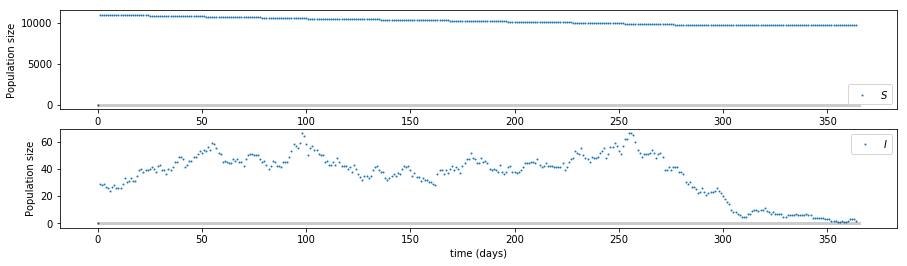

In [10]:
#Comportamiento suponiendo 2/10 de la poblacioón susceptible1 en contacto con los infectados1 y 3/10 de los susceptibles2 en contacto con los infectados2
p= {'nSteps':365,'stepSize':1.0,'exposure':0.5,'pSuccTrans':0.5,'pRemov':0.1, 'epsilon1':0.2, 'epsilon2':0.3,'s10':1000,'s20':10000,'i10':10,'i20':22,'r10':1,'r20':1}
[S1,I1,R1,S2,I2,R2]=pSIR(p)
rows=2; cols=1
f= gr.figure(figsize=(15,4))
axS = f.add_subplot(rows,cols,1)
axI = f.add_subplot(rows,cols,2)
axS.plot(S,'.',ms=2,alpha=1,label=r'$S$')
axI.plot(I,'.',ms=2,label=r'$I$')
#gr.plot(R,'.',ms=2,label=r'$R$')
axS.plot([0,p['nSteps']],[0,0],'k',lw=3,alpha=0.2)
axI.plot([0,p['nSteps']],[0,0],'k',lw=3,alpha=0.2)
axI.set_xlabel('time (days)')
axS.set_ylabel('Population size')
axI.set_ylabel('Population size')
axS.legend(); axI.legend()

print(sc.array([S1,I1,R1,S2,I2,R2]).transpose())
